In [18]:
# 导库
import matplotlib.pyplot as plt
import math
import sys

In [19]:
# 构建数据
X = [0.01 * x - 1.5 for x in range(100)]
Y = [2 * x ** 2 + 3 * x + 4 for x in X]
print(X)
print(Y)

[-1.5, -1.49, -1.48, -1.47, -1.46, -1.45, -1.44, -1.43, -1.42, -1.41, -1.4, -1.39, -1.38, -1.37, -1.3599999999999999, -1.35, -1.34, -1.33, -1.32, -1.31, -1.3, -1.29, -1.28, -1.27, -1.26, -1.25, -1.24, -1.23, -1.22, -1.21, -1.2, -1.19, -1.18, -1.17, -1.16, -1.15, -1.1400000000000001, -1.13, -1.12, -1.1099999999999999, -1.1, -1.0899999999999999, -1.08, -1.07, -1.06, -1.05, -1.04, -1.03, -1.02, -1.01, -1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.9299999999999999, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83, -0.82, -0.8099999999999999, -0.7999999999999999, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7, -0.69, -0.6799999999999999, -0.6699999999999999, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.57, -0.5599999999999999, -0.5499999999999999, -0.54, -0.53, -0.52, -0.51]
[4.0, 3.9702, 3.9408000000000003, 3.9117999999999995, 3.8831999999999995, 3.8550000000000004, 3.8271999999999995, 3.7997999999999994, 3.7728, 3.7462, 3.72

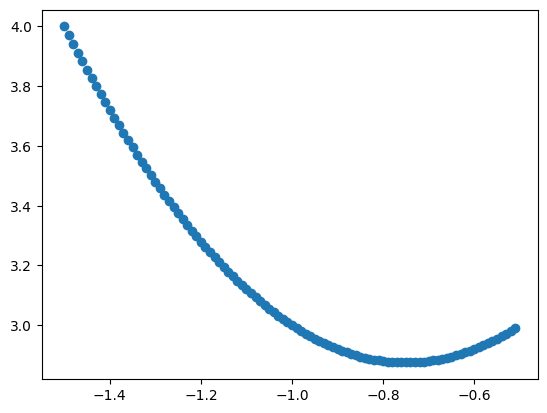

In [20]:
# 绘制散点图
plt.scatter(X, Y)
plt.show()

In [21]:
# 选定函数
def func(x):
    y = w1 * x ** 2 + w2 * x + w3
    return y

In [22]:
# 定义损失函数
def loss(y_pred, y_true):
    return (y_pred - y_true) ** 2

In [32]:
# 权重随机初始化
w1, w2, w3 = -1, 0, 1

In [24]:
# 设置学习率
lr = 0.1

In [25]:
# 训练过程
for epoch in range(1000):
    epoch_loss = 0
    for x, y_true in zip(X, Y):
        y_pred = func(x)
        epoch_loss += loss(y_pred, y_true)
        # 梯度计算  链式法则
        grad_w1 = 2 * (y_pred - y_true) * x ** 2
        grad_w2 = 2 * (y_pred - y_true) * x 
        grad_w3 = 2 * (y_pred - y_true)
        # 更新权重参数 SGD
        w1 -= lr * grad_w1
        w2 -= lr * grad_w2
        w3 -= lr * grad_w3

    # 计算每轮平均损失函数值
    epoch_loss /= len(X)
    print(f"第{epoch+1}轮，loss:{epoch_loss}")
    # 设定停止条件
    if epoch_loss < 10e-5:
        break

第1轮，loss:0.4654236465231076
第2轮，loss:0.035536154081919055
第3轮，loss:0.009713974885612313
第4轮，loss:0.0013995993665721473
第5轮，loss:0.0007034564201532901
第6轮，loss:0.0029149354329763293
第7轮，loss:0.0058886731287990865
第8轮，loss:0.008724299153354768
第9轮，loss:0.01110646707654325
第10轮，loss:0.012980039438449617
第11轮，loss:0.014394005296582245
第12轮，loss:0.015429330357502474
第13轮，loss:0.016167808884033005
第14轮，loss:0.016680386434922617
第15轮，loss:0.017024304120250647
第16轮，loss:0.017243907483751143
第17轮，loss:0.01737270561826099
第18轮，loss:0.01743561361275589
第19轮，loss:0.017450957221421433
第20轮，loss:0.017432115840749395
第21轮，loss:0.01738880711992997
第22轮，loss:0.017328063316028465
第23轮，loss:0.017254960041007582
第24轮，loss:0.017173153687631372
第25轮，loss:0.017085274525679636
第26轮，loss:0.01699321259967891
第27轮，loss:0.01689832483433007
第28轮，loss:0.016801584640236244
第29轮，loss:0.016703689767441954
第30轮，loss:0.016605139947813433
第31轮，loss:0.016506292731503124
第32轮，loss:0.016407403612153457
第33轮，loss:0.016308654

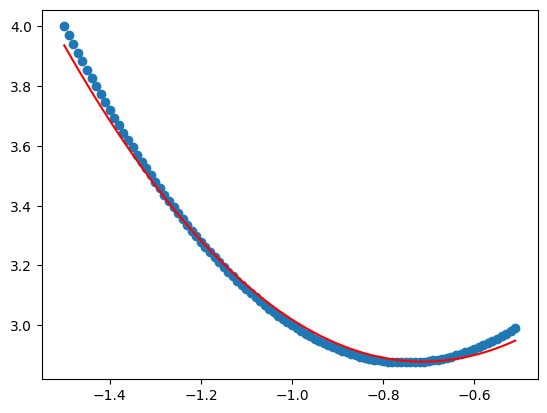

In [38]:
# 使用训练后模型输出预测值
Y_pred = [func(i) for i in X]

# 绘制拟合曲线
plt.plot(X, Y_pred, 'red')
plt.scatter(X, Y)
plt.show()

In [37]:
# 训练后的权重
print(f"w1:{w1}, w2:{w2}, w3:{w3}")

w1:1.7082421030241828, w2:2.4348575613586454, w3:3.74550653725477


In [36]:
# 批量梯度下降
# 训练过程
batch_size = 20  # 批次大小

for epoch in range(1000):
    epoch_loss = 0
    grad_w1 = 0
    grad_w2 = 0
    grad_w3 = 0
    count = 0
    for x, y_true in zip(X, Y):
        y_pred = func(x)
        epoch_loss += loss(y_pred, y_true)
        count += 1
        # 梯度计算  链式法则
        # 由于梯度累加出现梯度爆炸
        # 改进方法：对梯度求平均
        grad_w1 += 2 * (y_pred - y_true) * x ** 2
        grad_w2 += 2 * (y_pred - y_true) * x 
        grad_w3 += 2 * (y_pred - y_true)
        # 更新权重参数 mini-batch GD
        if count == batch_size:
            w1 -= lr * (grad_w1 / batch_size)
            w2 -= lr * (grad_w2 / batch_size)
            w3 -= lr * (grad_w3 / batch_size)
            grad_w1 = 0
            grad_w2 = 0
            grad_w3 = 0
            count = 0

    # 计算每轮平均损失函数值
    epoch_loss /= len(X)
    print(f"第{epoch+1}轮，loss:{epoch_loss}")
    # 设定停止条件
    if epoch_loss < 10e-4:
        break

第1轮，loss:0.004407694600296579
第2轮，loss:0.0043969761527274135
第3轮，loss:0.004386283769831183
第4轮，loss:0.0043756173882249835
第5轮，loss:0.004364976944679919
第6轮，loss:0.004354362376120894
第7轮，loss:0.004343773619626193
第8轮，loss:0.004333210612427087
第9轮，loss:0.00432267329190762
第10轮，loss:0.004312161595603825
第11轮，loss:0.004301675461204001
第12轮，loss:0.004291214826547649
第13轮，loss:0.004280779629625574
第14轮，loss:0.004270369808579433
第15轮，loss:0.004259985301701115
第16轮，loss:0.004249626047432804
第17轮，loss:0.004239291984366127
第18轮，loss:0.004228983051242279
第19轮，loss:0.004218699186951309
第20轮，loss:0.004208440330531809
第21轮，loss:0.00419820642117072
第22轮，loss:0.004187997398202816
第23轮，loss:0.004177813201110409
第24轮，loss:0.004167653769523042
第25轮，loss:0.0041575190432168885
第26轮，loss:0.004147408962114759
第27轮，loss:0.004137323466285449
第28轮，loss:0.00412726249594346
第29轮，loss:0.0041172259914488175
第30轮，loss:0.00410721389330645
第31轮，loss:0.004097226142166016
第32轮，loss:0.004087262678821486
第33轮，loss:0.00407